<a href="https://colab.research.google.com/github/baraa-hakawati/Car-Insurance-Claim-Analysis/blob/main/Car_Insurance_Claim_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Insurance Claim Analysis**

## **Google Drive Mounting**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Dataset Overview**

- **Target Variable:** OUTCOME (whether a claim was filed: 1.0 for claim, 0.0 for no claim)
- **Rows Represent:** Individual insurance policyholders
- **Features:** 18 columns including demographic, driving history, and vehicle information
- **Rows:** Approximately 1000 (exact count to be determined after cleaning)
- **Dimensionality Reduction Opportunities:** Several categorical features that could be encoded, potential to drop less relevant features
- **Challenges:** Missing values, categorical feature encoding, potential class imbalance

 ## **Data Loading and Inspection.**

### **Import Required Packages**

In [27]:
# Import required packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
pd.set_option('display.max_columns',100)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### **General Overview**

In [28]:
# Load the data
df = pd.read_csv(r"/content/drive/MyDrive/AXSOSACADEMY/03-DataEnrichment/Week09/Data/Car_Insurance_Claim.csv")
# Initial exploration
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [29]:
print("Target:", "OUTCOME")
print("Each row represents a person applying for or involved in a car insurance claim.")
print("Number of rows:", df.shape[0])
print("Number of features (excluding target):", df.shape[1] - 1)

Target: OUTCOME
Each row represents a person applying for or involved in a car insurance claim.
Number of rows: 10000
Number of features (excluding target): 18


### **Data Types vs. Dictionary**

In [30]:
# Display feature types within the dataset
print("\nThe datatypes of each feature in the data set (variable or columns) is:")
df.dtypes


The datatypes of each feature in the data set (variable or columns) is:


,0
ID,int64
AGE,object
GENDER,object
RACE,object
DRIVING_EXPERIENCE,object
EDUCATION,object
INCOME,object
CREDIT_SCORE,float64
VEHICLE_OWNERSHIP,float64
VEHICLE_YEAR,object


All features are matching the right data type.

### **Data Inconsistency**

In [31]:
values = df.select_dtypes(include=['object']).columns
for i in values:
    print(f'\n The value counts for {i} is:')
    print(df[i].value_counts())
    print('\n')


 The value counts for AGE is:
AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64



 The value counts for GENDER is:
GENDER
female    5010
male      4990
Name: count, dtype: int64



 The value counts for RACE is:
RACE
majority    9012
minority     988
Name: count, dtype: int64



 The value counts for DRIVING_EXPERIENCE is:
DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64



 The value counts for EDUCATION is:
EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64



 The value counts for INCOME is:
INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64



 The value counts for VEHICLE_YEAR is:
VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: count, dtype: int64



 The value counts for VEHICLE_TYPE is:
VEHICLE_TYPE
sedan         9523
sports car     477
Name: count, dtype: int64


No data inconsistencies where deticted.

### **Missing Values**

In [32]:
# Identify missing values
print(f"\nOverall missing values in the dataset are {df.isnull().sum().sum()}, and in each feature are:")
df.isnull().sum()


Overall missing values in the dataset are 1939, and in each feature are:


,0
ID,0
AGE,0
GENDER,0
RACE,0
DRIVING_EXPERIENCE,0
EDUCATION,0
INCOME,0
CREDIT_SCORE,982
VEHICLE_OWNERSHIP,0
VEHICLE_YEAR,0


### **Unusual Data Points Identification**

In [33]:
# At this sub-process, We have to check the numarical features in this stage.
# Step 1: Selecting only numarecal columns.
num_col = df.select_dtypes(include=['number']).columns
df[num_col].describe() # Display the overall stats for each feature to determine unusual data points.

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


## **Exploratory Data Analysis**

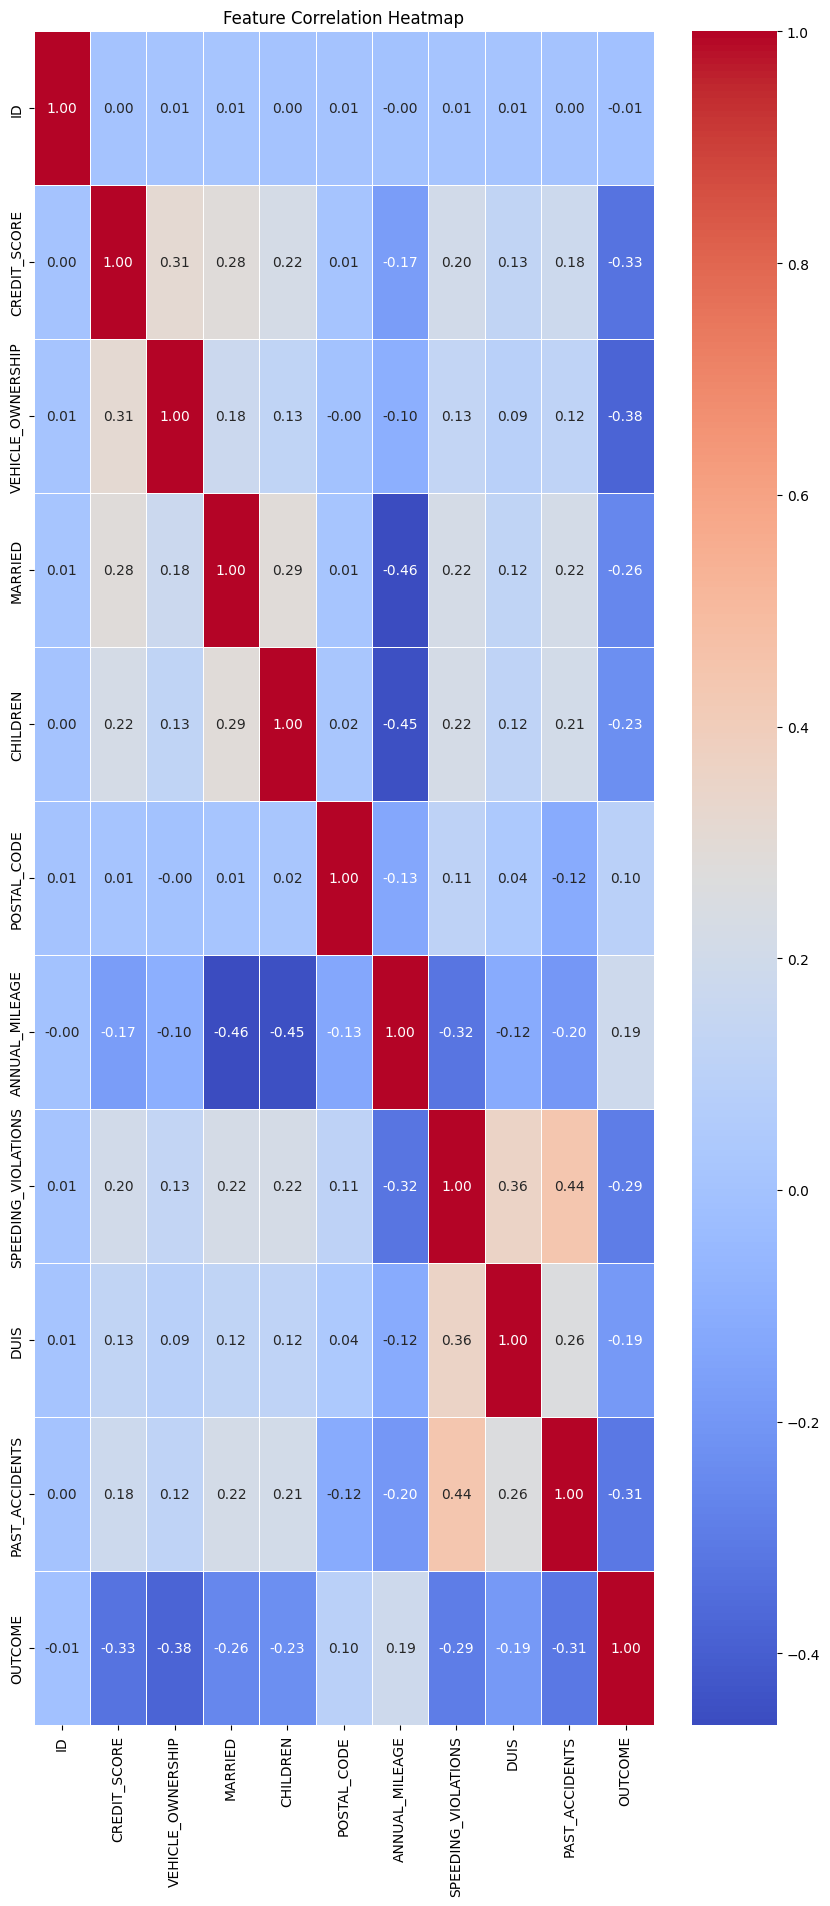

In [34]:
# Define the numerical columns in the dataset
numaric = df.select_dtypes("number").columns
# Heatmap for correlations
plt.figure(figsize=(10, 2 * len(numaric)))
corr = df[numaric].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

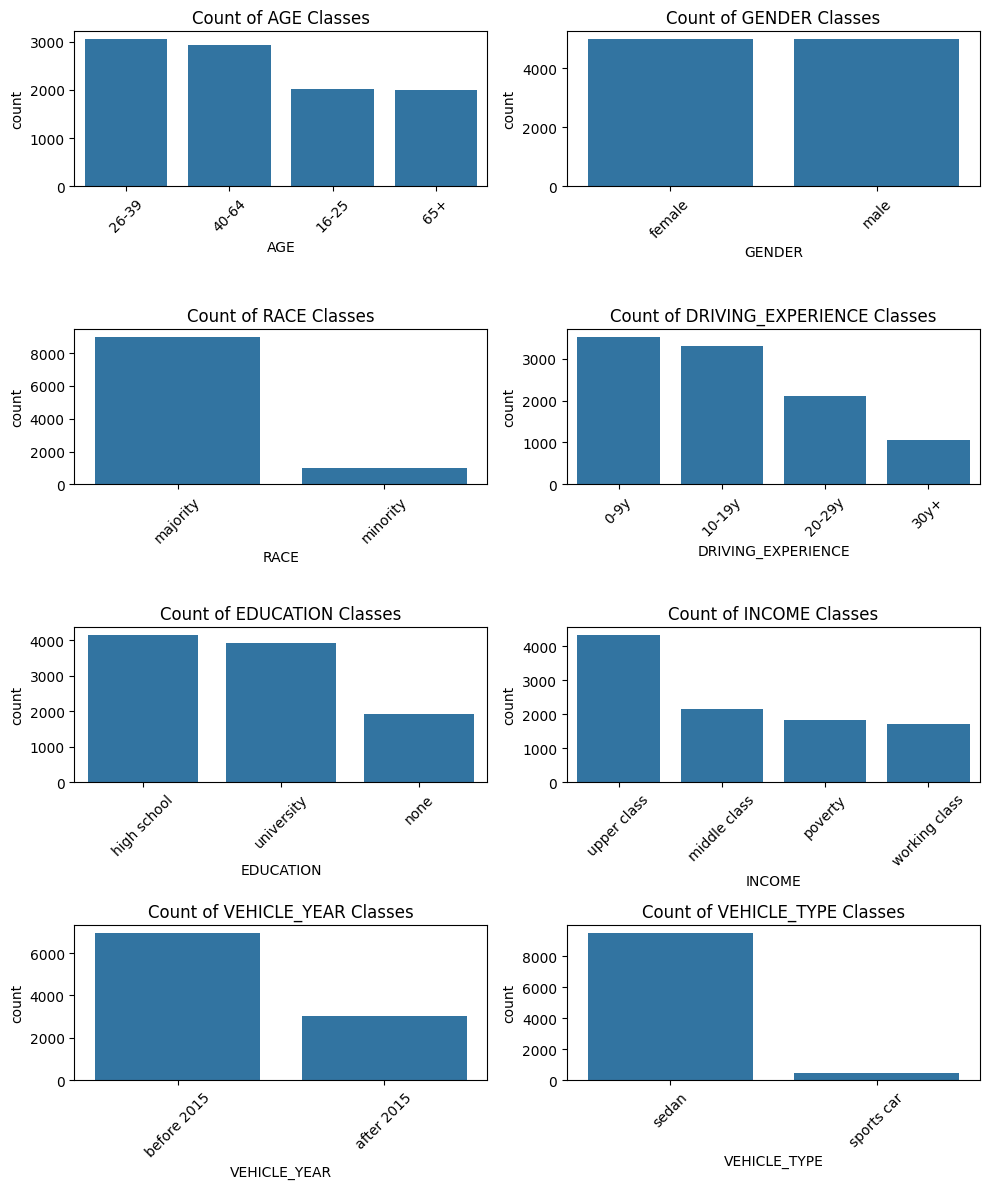

In [35]:
categoric = df.select_dtypes("object").columns
num_cat_fea = len(categoric)
cat_rows = (num_cat_fea // 2) + (num_cat_fea % 2)
# Countplots for categorical features
plt.figure(figsize=(10,3 * cat_rows))
for i, feature in enumerate(categoric, 1):
    plt.subplot(cat_rows, 2, i)
    sns.countplot(x=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Count of {feature} Classes')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Preprocesing for Machine Learning**

In [36]:
X = df.drop(columns=['ID','OUTCOME'])
y = df['OUTCOME']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (7500, 17)
Test set shape: (2500, 17)


In [37]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Numeric Columns: Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [38]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
        'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
        'PAST_ACCIDENTS'],
       dtype='object'))

In [39]:
ord_cols = ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR']
print("Ordinal Columns:", ord_cols)
age_order = ['NA', '16-25', '26-39', '40-64', '65+']  # Young to old
experience_order = ['NA', '0-9y', '10-19y', '20-29y', '30y+']  # Less to more experience
education_order = ['NA', 'none', 'high school', 'university']  # Less to more education
income_order = ['NA', 'poverty', 'working class', 'middle class', 'upper class']  # Lowest to highest income
vehicle_year_order = ['NA', 'before 2015', 'after 2015']  # Older to newer
ordinal_category_orders = [
    age_order,
    experience_order,
    education_order,
    income_order,
    vehicle_year_order
]
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
scaler_ord = StandardScaler()
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

Ordinal Columns: ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['NA', '16-25', '26-39', '40-64',
                                             '65+'],
                                            ['NA', '0-9y', '10-19y', '20-29y',
                                             '30y+'],
                                            ['NA', 'none', 'high school',
                                             'university'],
                                            ['NA', 'poverty', 'working class',
                                             'middle class', 'upper class'],
                                            ['NA', 'before 2015',
                                             'after 2015']])),
                ('standardscaler', StandardScaler())])

In [40]:
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['NA', '16-25', '26-39', '40-64',
                                              '65+'],
                                             ['NA', '0-9y', '10-19y', '20-29y',
                                              '30y+'],
                                             ['NA', 'none', 'high school',
                                              'university'],
                                             ['NA', 'poverty', 'working class',
                                              'middle class', 'upper class'],
                                             ['NA', 'before 2015',
                                              'after 2015']])),
                 ('standardscaler', StandardScaler())]),
 ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR'])

In [41]:
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='most_frequent', fill_value='missing')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

OneHotEncoder Columns: Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing', strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [42]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='missing', strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object'))

In [43]:
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple], verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',...
                                                  StandardScaler())]),
                                 ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION',
                                  'INCOME', 'VEHICLE_YEAR']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object'))],
                  verbose_feature_names_out=False)

## **Data Modeling**

### **Simple Model**

In [44]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [45]:
model = RandomForestClassifier(random_state=42)
model_pipe = make_pipeline(preprocessor, model)
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('ordin...
                                                   'VEHICLE_YEAR']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



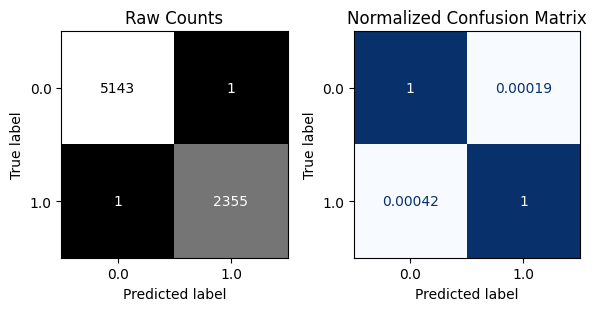


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1723
         1.0       0.76      0.67      0.71       777

    accuracy                           0.83      2500
   macro avg       0.81      0.79      0.80      2500
weighted avg       0.83      0.83      0.83      2500



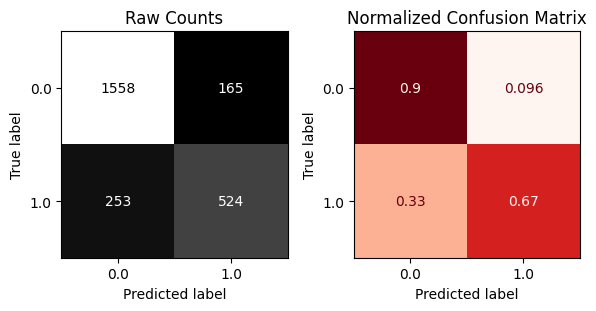

In [46]:
results = evaluate_classification(
    model_pipe, X_train, y_train, X_test, y_test,
    figsize=(6, 4), normalize='true', output_dict=True,
    cmap_train='Blues', cmap_test="Reds", colorbar=False
)

In [47]:
perm_importance = permutation_importance(model_pipe, X_test, y_test, n_repeats=30, random_state=0)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

<ipython-input-48-3f0b0a51eacf>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




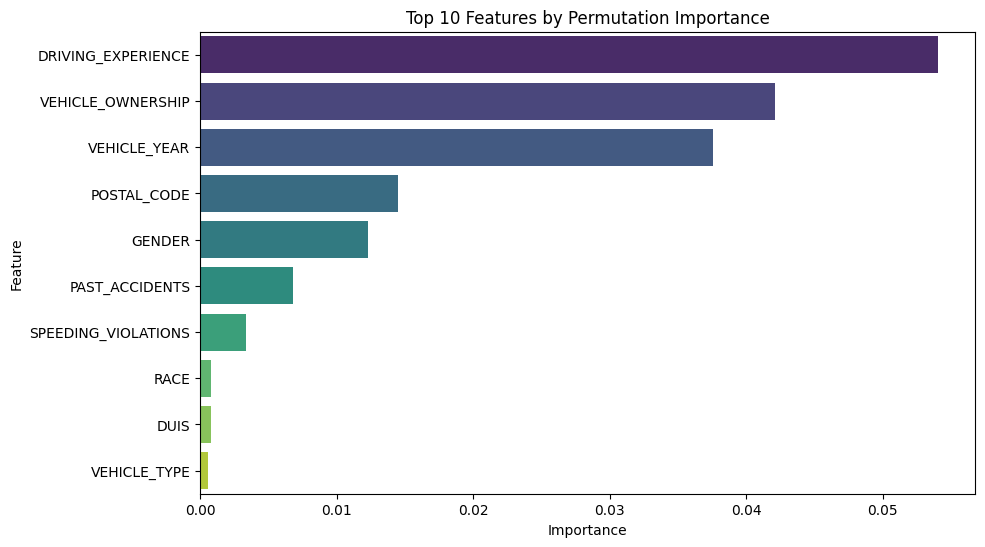

In [48]:
top10 = importance_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top10, palette="viridis")
plt.title("Top 10 Features by Permutation Importance")
plt.show()

In [49]:
result = permutation_importance(model_pipe, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importances = result.importances_mean

In [50]:
feature_names = X.columns  # Replace with actual feature names after preprocessing
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

In [51]:
target = 'OUTCOME'
top_features = feature_importances['Feature'].head(2).tolist()
for feature in top_features:
    # Create a plotly bar chart
    fig = px.histogram(df, x=feature, color=target, barmode='group',
                       title=f'{feature} vs {target}',
                       labels={feature: feature, target: 'Claim Outcome'})
    fig.show()

### **PCA**

In [63]:
# Create a pipeline that includes the preprocessor, PCA, and model
pca_pipe = make_pipeline(
    preprocessor,
    PCA(n_components=3, random_state=42),
    RandomForestClassifier(random_state=42)
)
pca_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('ordin...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('pca', PCA(n_components=3, random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [64]:
pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('ordin...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['GENDER', 'RACE', 'VEHICLE_TYPE'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('pca', PCA(n_components=3, random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



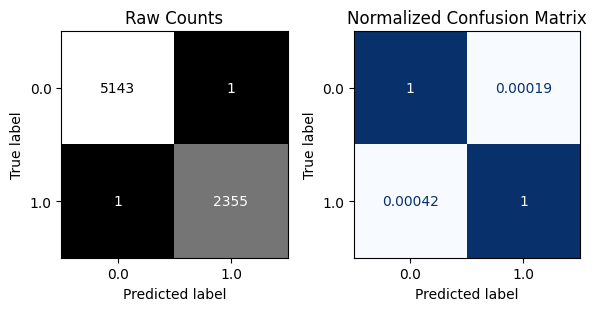


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      1723
         1.0       0.69      0.60      0.64       777

    accuracy                           0.79      2500
   macro avg       0.76      0.74      0.75      2500
weighted avg       0.79      0.79      0.79      2500



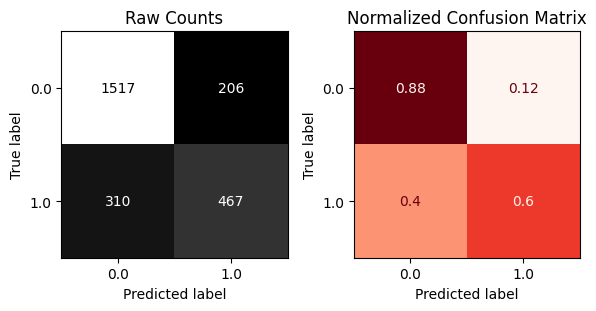

In [65]:
pca_results = evaluate_classification(
    pca_pipe,
    X_train, y_train,
    X_test, y_test,
    figsize=(6, 4),
    normalize='true',
    output_dict=True,
    cmap_train='Blues',
    cmap_test="Reds",
    colorbar=False
)

### **KMeans**

In [66]:
# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [67]:
X_train_scaled = scaler.fit_transform(X_train_processed)
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)

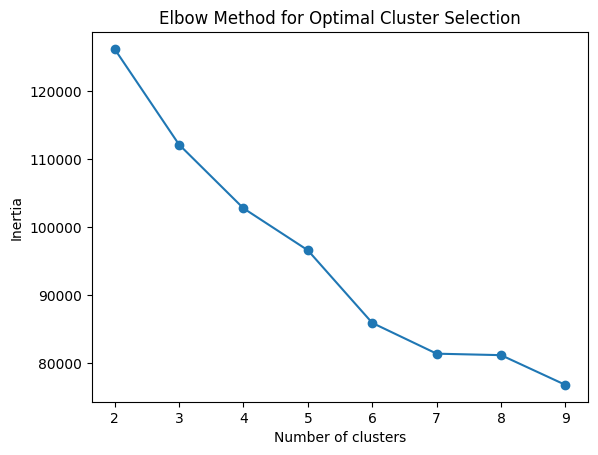

In [68]:
plt.plot(range(2, 10), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Selection')
plt.show()

In [69]:
kmeans = KMeans(n_clusters=4, random_state=42)
train_clusters = kmeans.fit_predict(X_train_scaled)
test_clusters = kmeans.predict(scaler.transform(X_test_processed))

In [70]:
X_train_enhanced = np.hstack([X_train_processed, train_clusters.reshape(-1, 1)])
X_test_enhanced = np.hstack([X_test_processed, test_clusters.reshape(-1, 1)])

In [75]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier(random_state=42)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X_train_enhanced, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)

In [76]:
X_train_selected = selector.transform(X_train_enhanced)
X_test_selected = selector.transform(X_test_enhanced)

In [77]:
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       0.99      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



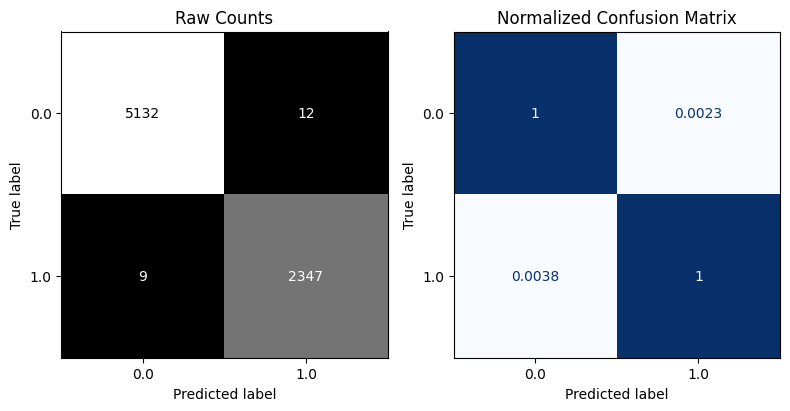


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87      1723
         1.0       0.73      0.68      0.71       777

    accuracy                           0.82      2500
   macro avg       0.80      0.79      0.79      2500
weighted avg       0.82      0.82      0.82      2500



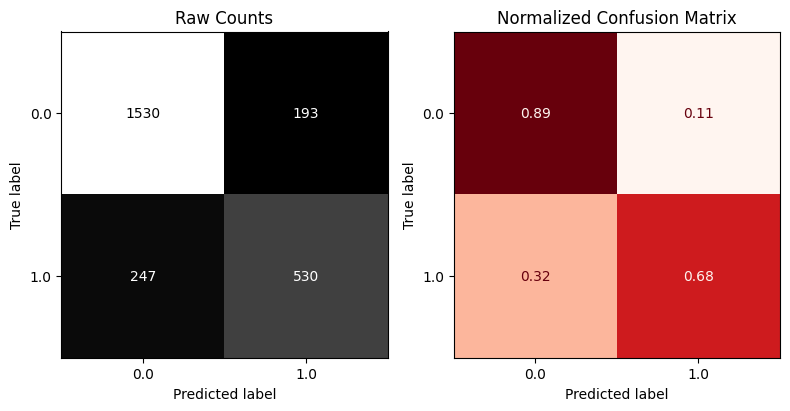

In [78]:
final_results = evaluate_classification(
    final_model,
    X_train_selected, y_train,
    X_test_selected, y_test,
    figsize=(8, 4),
    normalize='true',
    output_dict=True,
    cmap_train='Blues',
    cmap_test="Reds"
)